# Prediccion de Diabetes

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline

import seaborn as sns

In [2]:
dataframe = pd.read_csv('diabetes_prediction_dataset.csv')
dataframe.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Análisis de las características


### Análisis de Genero

Total de personas evaluadas en el estudio
- Hombres
- Mujeres
- Otros

In [3]:
df_gender= dataframe.groupby(['gender', 'diabetes']).size().unstack(level=0)
df_gender

gender,Female,Male,Other
diabetes,,,
0,54091.0,37391.0,18.0
1,4461.0,4039.0,NaN


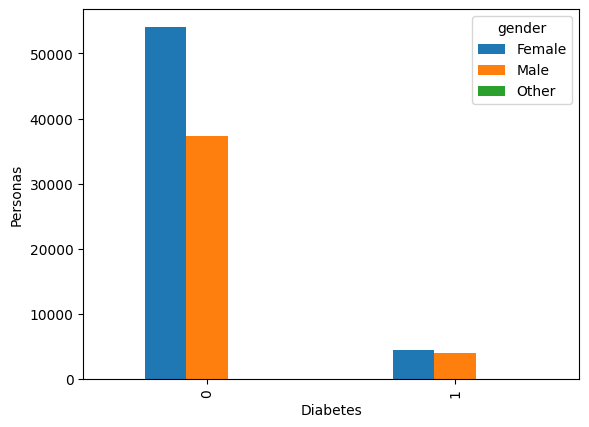

In [4]:
ax = df_gender.plot(kind='bar', xlabel='Diabetes', ylabel='Personas')

### Análisis por Edad

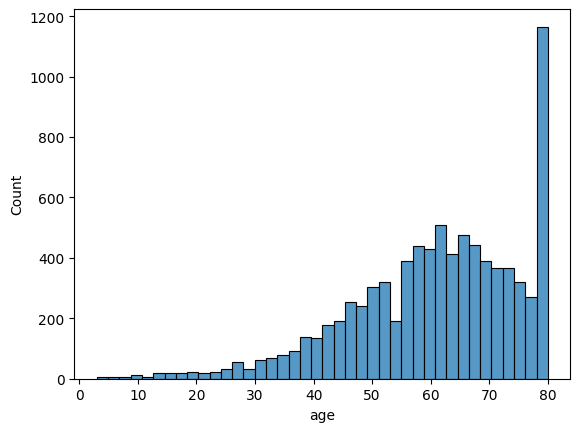

In [5]:
df_age_diabetes = dataframe[['age', 'diabetes']]
df_age_diabetes = df_age_diabetes[df_age_diabetes['diabetes'] == 1]
ax = sns.histplot(data=df_age_diabetes, x='age')

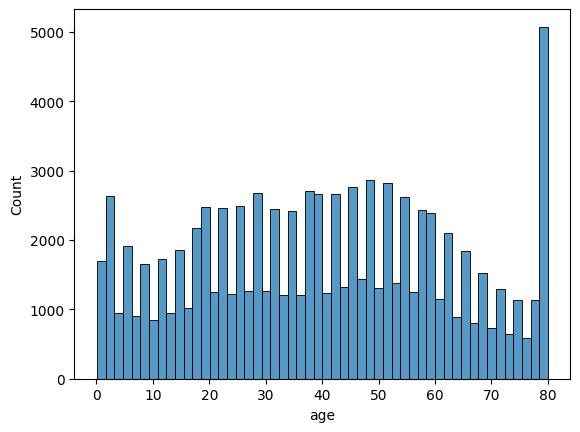

In [6]:
df_age_no_diabetes = dataframe[['age', 'diabetes']]
df_age_no_diabetes = df_age_no_diabetes[df_age_no_diabetes['diabetes'] == 0]
ax = sns.histplot(data=df_age_no_diabetes, x='age')

### Análisis por Hipertensión, Cardiopatía

In [7]:
df_heart_disease= dataframe.groupby(['diabetes', 'heart_disease']).size().unstack(level=0)
df_heart_disease

diabetes,0,1
heart_disease,,
0,88825,7233
1,2675,1267


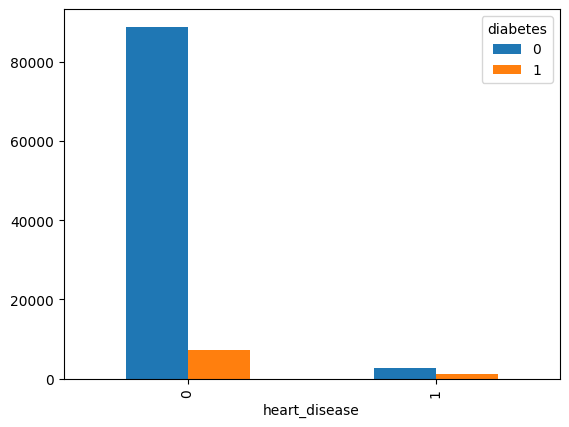

In [8]:
ax = df_heart_disease.plot(kind='bar')

In [9]:
df_hypertension= dataframe.groupby(['diabetes', 'hypertension']).size().unstack(level=0)
df_hypertension

diabetes,0,1
hypertension,,
0,86103,6412
1,5397,2088


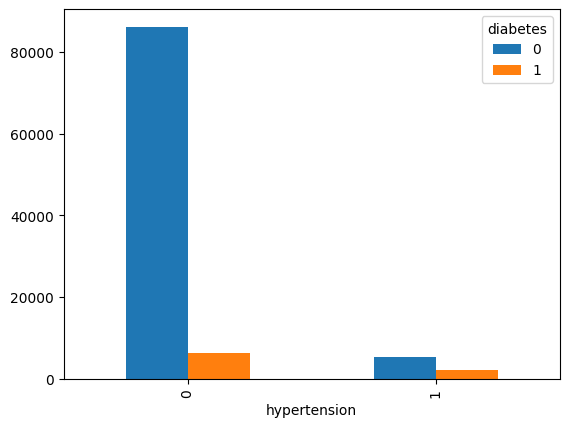

In [10]:
ax = df_hypertension.plot(kind='bar')

### Análisis por Historial de fumador


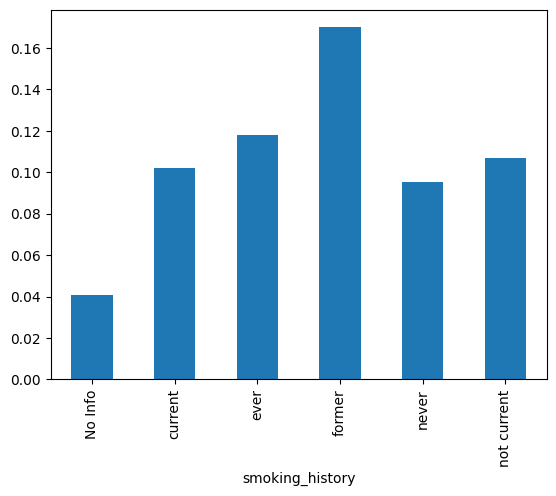

In [11]:
df_smoking = dataframe.groupby('smoking_history')['diabetes'].mean()
ax = df_smoking.plot(kind = 'bar')


###  Análisis por Nivel de Glucosa en sangre

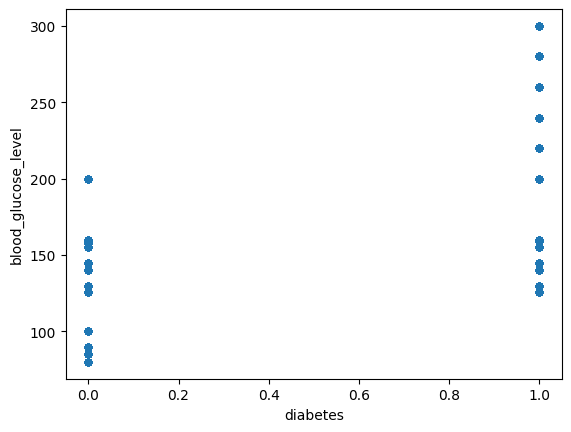

In [12]:
df_blood_glucose_level = dataframe[['blood_glucose_level', 'diabetes']]
ax = df_blood_glucose_level.plot.scatter(x='diabetes', y='blood_glucose_level')

###  Análisis por HbAc1

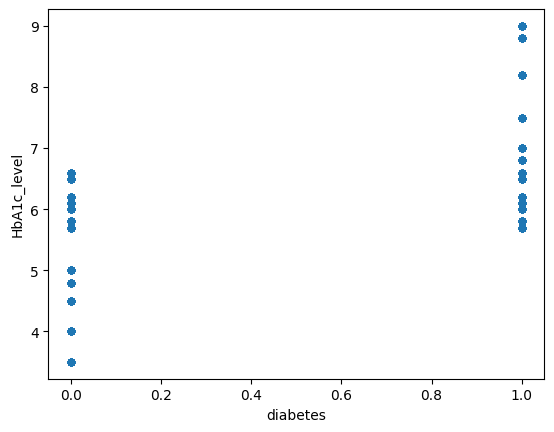

In [13]:
df_blood_glucose_level = dataframe[['HbA1c_level', 'diabetes']]
ax = df_blood_glucose_level.plot.scatter(x='diabetes', y='HbA1c_level')

[]

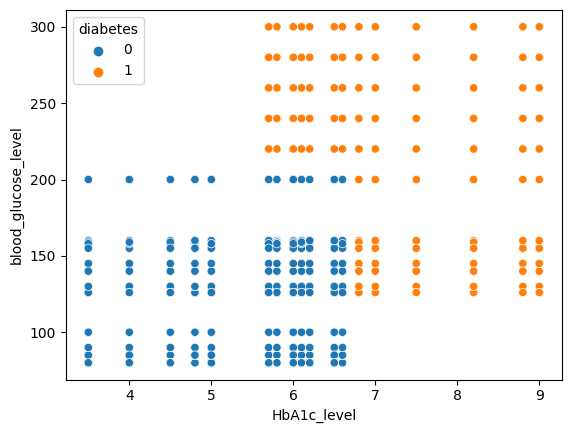

In [14]:
ax = sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data = dataframe)
plt.plot()

### Análisis por Indice de Masa Corporal

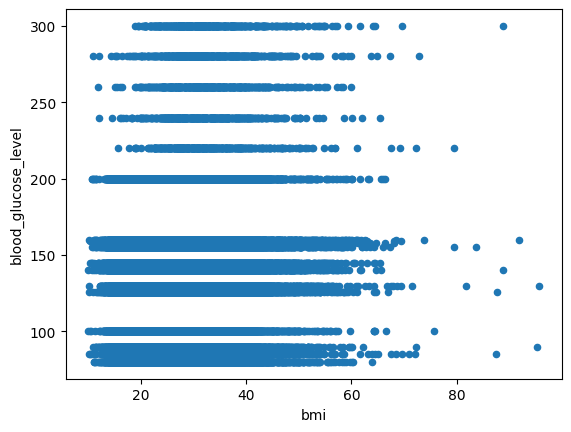

In [15]:
df_blood_glucose_level = dataframe[['bmi', 'blood_glucose_level']]
ax = df_blood_glucose_level.plot.scatter(x='bmi', y='blood_glucose_level')

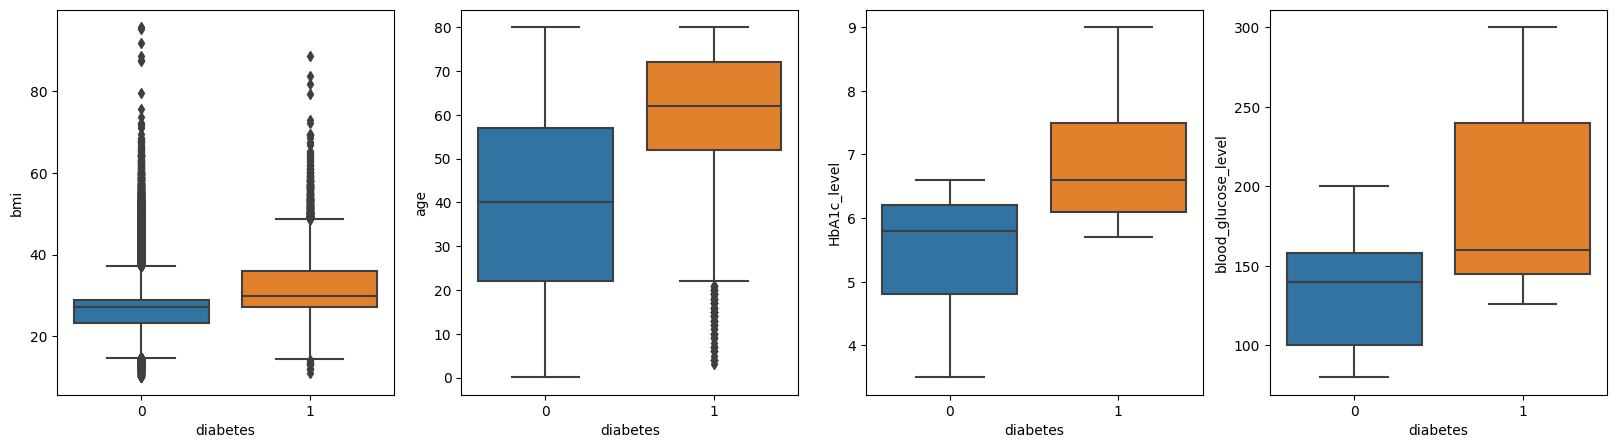

In [16]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,5))
sns.boxplot(ax = axes[0],x = "diabetes", y = "bmi", data = dataframe)
sns.boxplot(ax = axes[1],x = "diabetes", y = "age", data = dataframe)
sns.boxplot(ax = axes[2],x = "diabetes", y = "HbA1c_level", data = dataframe)
sns.boxplot(ax = axes[3],x = "diabetes", y = "blood_glucose_level",data = dataframe)
plt.show()

## Matriz de correlacion

<ipython-input-17-3186b2828790>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = dataframe.corr()


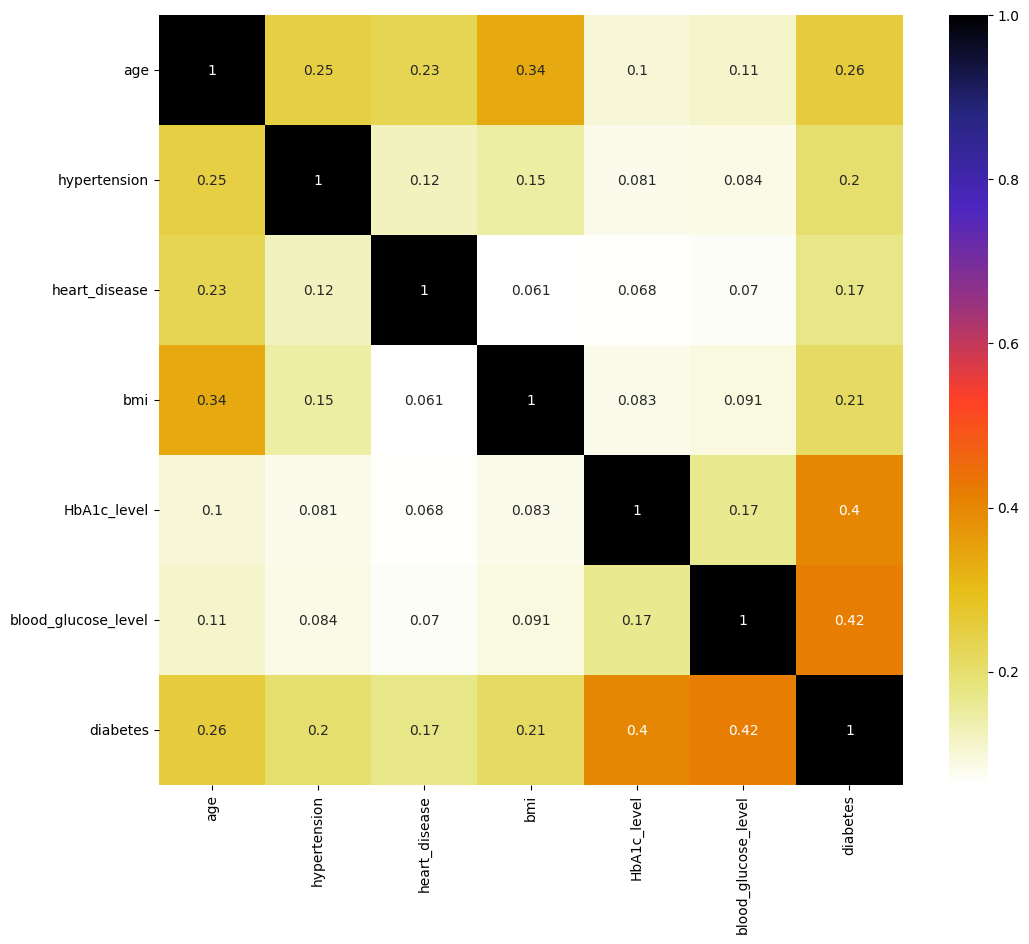

In [17]:
plt.figure(figsize=(12,10))
cor = dataframe.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r);
plt.show();

### Insights

- El número de hombre y mujeres con diabetes se encuentran muy cercanos por lo que podriamos inferir que el genero no esta relaciona de forma directa con la diabetes, tanto hombre como mujeres puede tener diabetes por igual.


- El historia de fumador es otra caracteristica que parece que no tiene relacion con la diabetes


- La hipertensión y la cardiomiopatía parecen no tener relación con la diabetes.

## Pre-procesamiento de los datos

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [19]:
X = dataframe.drop('diabetes',axis=1)
y = dataframe.diabetes

In [20]:
label_encoder = le_sex = preprocessing.LabelEncoder()
for type_, column in zip(X.dtypes.values, X.columns.values):
  if type_  == 'object':
    X[column] = label_encoder.fit_transform(X[column])

X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


Separacion del dataset

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

El dataset se encuentra desbalanceado tenemos un conjuto de datos con mayor numero de no diabeticos que diabeticos por lo que es necesario hacer un ajuste

In [22]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE()
X_over, y_over = oversampler.fit_resample(X_train, y_train)

In [23]:
scalar = StandardScaler()
X_over_scaled = scalar.fit_transform(X_over)
X_test_scaled = scalar.transform(X_test)

In [24]:
X_over

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.000000,1,0,0,27.320000,3.500000,155
1,1,78.000000,0,0,4,28.490000,6.000000,145
2,0,39.000000,0,0,0,27.320000,3.500000,140
3,0,48.000000,0,0,0,25.600000,6.000000,85
4,0,61.000000,0,0,2,32.550000,4.800000,130
...,...,...,...,...,...,...,...,...
146431,0,69.172702,0,0,0,24.594652,8.861838,300
146432,0,65.549464,0,0,4,28.643087,6.439571,155
146433,0,57.543498,0,0,3,27.496771,6.554350,130
146434,0,80.000000,0,0,5,25.926039,5.995631,130


# Modelo de K Nearest Neighbor

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [26]:
accuracy_rate = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_over,y_over,cv=3)
    accuracy_rate.append(score.mean())

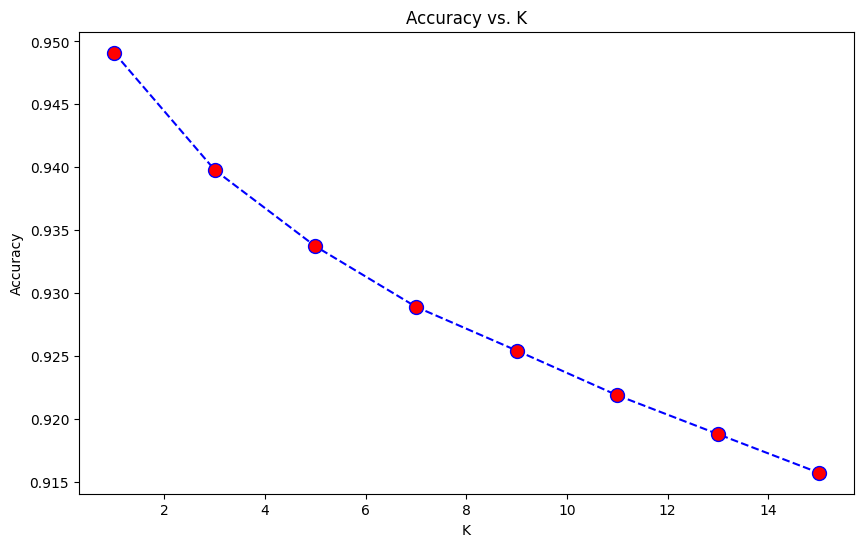

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16,2),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K')
plt.xlabel('K');
plt.ylabel('Accuracy');

In [28]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_over,y_over)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96     18282
           1       0.54      0.67      0.60      1718

    accuracy                           0.92     20000
   macro avg       0.76      0.81      0.78     20000
weighted avg       0.93      0.92      0.93     20000



In [29]:
import pickle

pickle.dump(knn, open('pollo.pkl','wb'))

In [31]:
prediction_1 = model_pkl.predict(X_test)
prediction_1

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
prediction_1

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
X_test_scaled[0]

array([-0.72618735, -1.14335629, -0.28698778, -0.19629339,  1.51841832,
        0.02863393,  0.37972919, -0.06328074])